In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pyplot

In [2]:
df =pd.read_csv('VCB_Stock_Data.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/27/2014,12352807617,12352807617,12181833984,12181833984,12181833984,1740361
1,2/6/2014,12181833984,12181833984,11882630859,11925374023,11925374023,2882673
2,2/7/2014,11968117188,12053604492,11839887695,11882630859,11882630859,1889556
3,2/10/2014,11925374023,12096347656,11839887695,12096347656,12096347656,1143474
4,2/11/2014,12139090820,12224577148,12053604492,12096347656,12096347656,2232159
...,...,...,...,...,...,...,...
2454,12/7/2023,85700000000,86000000000,85000000000,85200000000,85200000000,2403460
2455,12/8/2023,85200000000,85500000000,85000000000,85000000000,85000000000,1293000
2456,12/11/2023,85000000000,85300000000,84100000000,84200000000,84200000000,2768100
2457,12/12/2023,84700000000,84700000000,84000000000,84200000000,84200000000,1148400


In [3]:
data = df['Close'][::-1];
val= data.reset_index(drop=True);
val

0       83700000000
1       84200000000
2       84200000000
3       85000000000
4       85200000000
           ...     
2454    12096347656
2455    12096347656
2456    11882630859
2457    11925374023
2458    12181833984
Name: Close, Length: 2459, dtype: int64

In [4]:
# Create a date range starting from a specific date
start_date = '1/27/2014'
stop_date = '12/14/2023'
dates = pd.date_range(start=start_date, periods=len(val),freq='D')

In [5]:
# 2.  chia train test theo tỉ lệ 9-1
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing
train_size = int(0.9* len(df))
test_size = int(0.1* len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [6]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=97092.793, Time=2.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=97105.899, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=97107.078, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=97107.086, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=97105.793, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=97111.131, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=97111.064, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=97096.364, Time=1.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=97094.460, Time=1.91 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=97109.079, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=97109.246, Time=0.95 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=97108.975, Time=0.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=97097.179, Time=3.30 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=97104.968, Time=1.27 sec

Best model:  ARIMA

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [7]:
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [10]:
#Train all data to predict next 30 days.

last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


Predicted closing prices for the next 30 days:
[6.56925673e+10 6.56705389e+10 6.55458906e+10 6.55605001e+10
 6.57019212e+10 6.57443882e+10 6.56470853e+10 6.56085968e+10
 6.57125232e+10 6.57952351e+10 6.57418028e+10 6.56763897e+10
 6.57336551e+10 6.58303713e+10 6.58231789e+10 6.57555699e+10
 6.57697179e+10 6.58584721e+10 6.58891673e+10 6.58376693e+10
 6.58206360e+10 6.58873232e+10 6.59416407e+10 6.59159474e+10
 6.58831230e+10 6.59223748e+10 6.59848896e+10 6.59863757e+10
 6.59522921e+10 6.59662072e+10]


Testing RMSE: 15594412502.516079
Testing MAPE: 0.17287573131476086
Testing MSLE: 0.04185210268944358


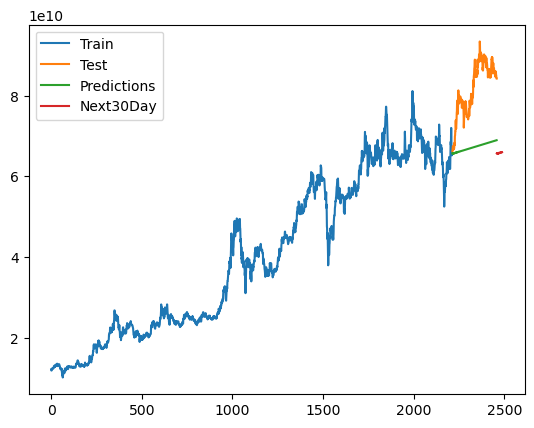

In [11]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_absolute_percentage_error

# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# Calculate MSLE
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()